In [2]:
# Install libraries if needed (this step is often unnecessary in Colab)
!pip install numpy pandas matplotlib

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Print versions to verify installations
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)



NumPy version: 1.26.4
Pandas version: 2.1.4


# Linear Regression

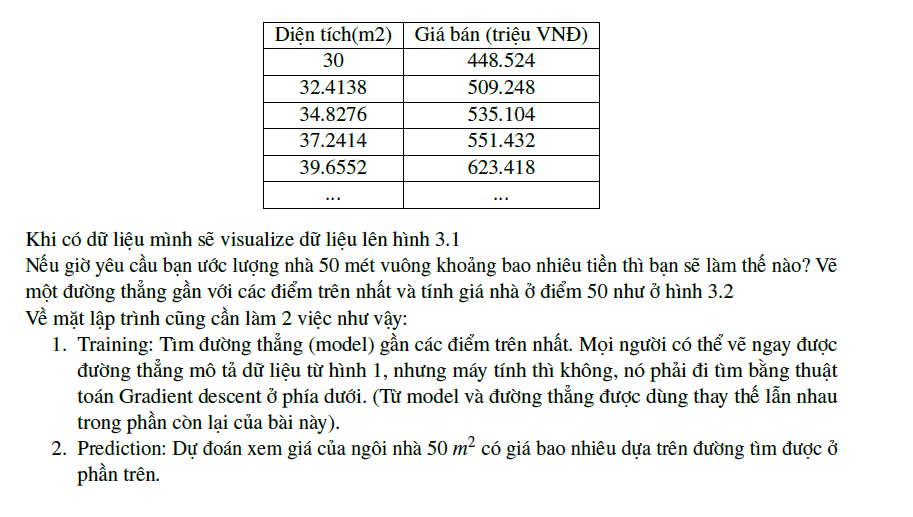

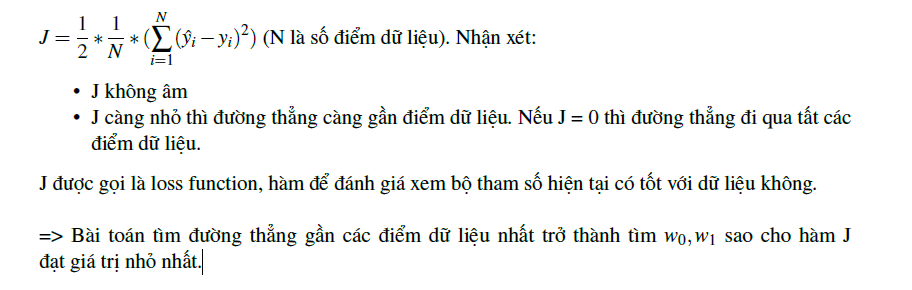

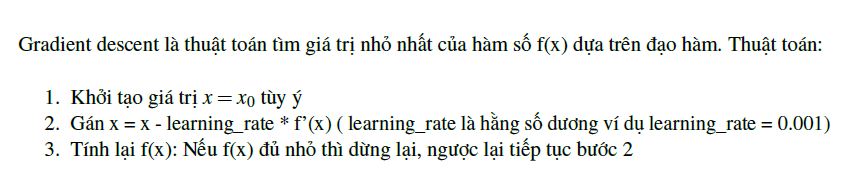

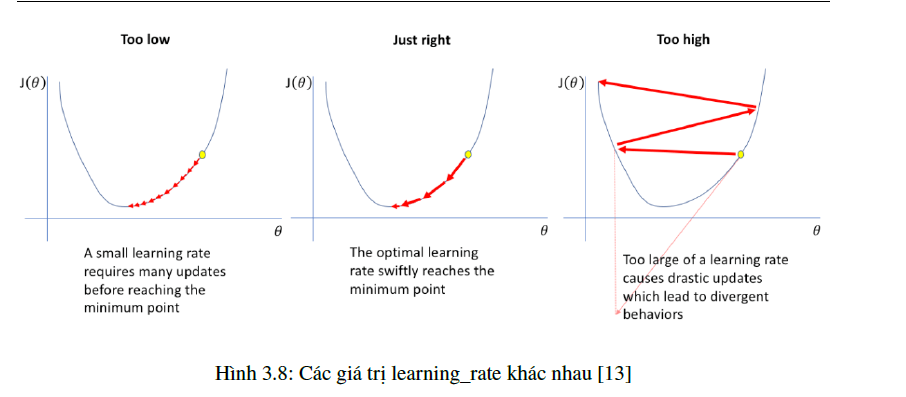

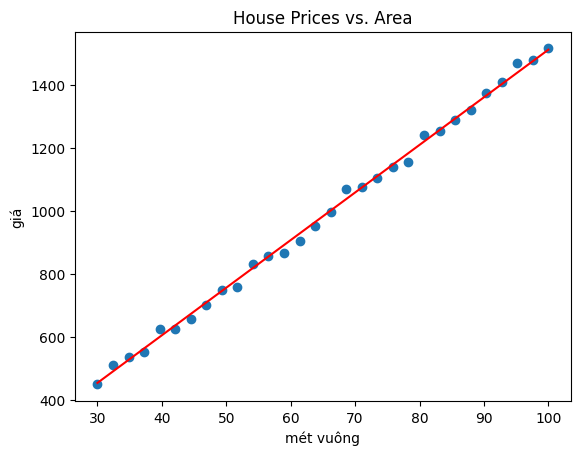

Giá nhà cho 50m^2 là :  755.6279671462376


In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/ClupusVT/AI_machine_learning/97a67fa8cd900213b0b5b35bb82cba9855dd3613/1st_Self_learning/data_house_price.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

# Scatter plot of the data
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.title('House Prices vs. Area')

# Add a column of ones to x (for the bias term)
x = np.hstack((np.ones((N, 1)), x))

# Initialize weights
w = np.array([0., 1.]).reshape(-1, 1)

# Set hyperparameters
numOfIteration = 1000  # The number of times to perform training
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.00001

# Gradient Descent
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5 * np.sum(r * r)  # Calculate the cost
    w[0] -= learning_rate * np.sum(r)  # Update the bias term
    w[1] -= learning_rate * np.sum(np.multiply(r, x[:, 1].reshape(-1, 1)))  # Update the weight term

# Predict values using the trained weights
predict = np.dot(x, w)

# Plot the linear regression line
plt.plot((x[0][1], x[N-1][1]), (predict[0], predict[N-1]), 'r')
plt.show()


# Predict the house price for 50 m^2
x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là : ', y1[0])



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/ClupusVT/AI_machine_learning/97a67fa8cd900213b0b5b35bb82cba9855dd3613/1st_Self_learning/data_house_price.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

# Plot data
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

# Add bias term
X = np.hstack((np.ones((N, 1)), x))

# Initialize weights
w = np.zeros((2, 1))

# Set hyperparameters
num_iterations = 1000
learning_rate = 0.00001

# Gradient Descent
for _ in range(num_iterations):
    predictions = X @ w
    errors = predictions - y
    gradients = (X.T @ errors) / N
    w -= learning_rate * gradients

    # Optional: Calculate and print cost
    cost = (errors ** 2).sum() / (2 * N)
    print(f'Cost: {cost}')

# Plot the regression line
plt.plot(x, X @ w, 'r')
plt.show()

# Prediction
x1 = 50
y1 = w[0] + w[1] * x1
print(f'Giá nhà cho {x1}m^2 là : {y1[0]}')


# **How the code optimize the linear regression** **bold text**
1. Matrix Multiplication (X @ w and X.T @ errors):
X @ w: This performs a matrix multiplication between the feature matrix X and the weight vector w. In linear algebra, this computes the predicted values for all training examples in one operation. Matrix multiplication is optimized in NumPy and allows for parallel computation, making it much faster than iterating through each data point.
X.T @ errors: This computes the gradient of the cost function with respect to the weights in one operation. By taking the dot product of the transpose of X and the errors, it efficiently calculates the gradients without needing explicit loops.
2. Avoiding Explicit Loops:
The code avoids explicit loops for updating each weight individually. Instead, it uses vectorized operations which are inherently faster due to optimized low-level implementations in NumPy. These operations are highly optimized for performance and make use of efficient memory access patterns and parallel processing.
3. Gradient Calculation:
gradients = (X.T @ errors) / N: This computes the gradient of the cost function with respect to the weights. By dividing by N, it averages the gradient over all data points. This approach ensures that the gradient calculation is vectorized and leverages the efficiency of matrix operations.
4. Weight Update:
w -= learning_rate * gradients: This performs a single operation to update all weights simultaneously. The vectorized approach ensures that weight updates are done efficiently, avoiding the overhead of multiple individual updates.
5. Cost Calculation:
cost = (errors ** 2).sum() / (2 * N): Calculates the cost in a vectorized manner. This ensures that the cost function is computed quickly by summing the squared errors over all data points in one operation.
Summary of Benefits:
Speed: Matrix operations are highly optimized for performance. NumPy's underlying implementation leverages low-level optimizations, multi-threading, and vectorization to perform operations faster than loops.
Simplicity: Vectorized operations make the code cleaner and easier to understand. It avoids the need for nested loops and manual index management.
Scalability: Matrix operations scale better with larger datasets and higher-dimensional feature spaces, making them more suitable for real-world applications.

# Logistic Regression


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 26 13:49:07 2019

@author: DELL
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):

	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    print(cost[i])

# Vẽ đường phân cách.
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

# Neural Network

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical  # Updated import
from keras.datasets import mnist




Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.


In [40]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.


In [41]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Bước này chuyển đổi one-hot encoding label Y của ảnh ví dụ số 5 thành vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [42]:
# 4. One hot encoding label (Y)
# Convert labels to one-hot encoding
print('Dữ liệu y ban đầu ', y_train[0])
y_train = to_categorical(y_train, 10)  # Updated function
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)    # Updated function
print('Dữ liệu y sau one-hot encoding ',y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bước này định nghĩa model:
1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2.  Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))


In [28]:
# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [29]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# 7. Thực hiện train model với data
H = model.fit(X_train, y_train, validation_data=(X_val, y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.9834 - loss: 0.0592 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.9887 - loss: 0.0386 - val_accuracy: 0.9856 - val_loss: 0.0481
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 64ms/step - accuracy: 0.9946 - loss: 0.0217 - val_accuracy: 0.9885 - val_loss: 0.0417
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.9962 - loss: 0.0147 - val_accuracy: 0.9874 - val_loss: 0.0420
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 64ms/step - accuracy: 0.9979 - loss: 0.0094 - val_accuracy: 0.9868 - val_loss: 0.0479
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 63ms/step - accuracy: 0.9987 - loss: 0.0067 - val_accuracy: 0.9888 - val_loss: 0.0421
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9891 - val_loss: 0.0409
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 63ms/step - accuracy: 

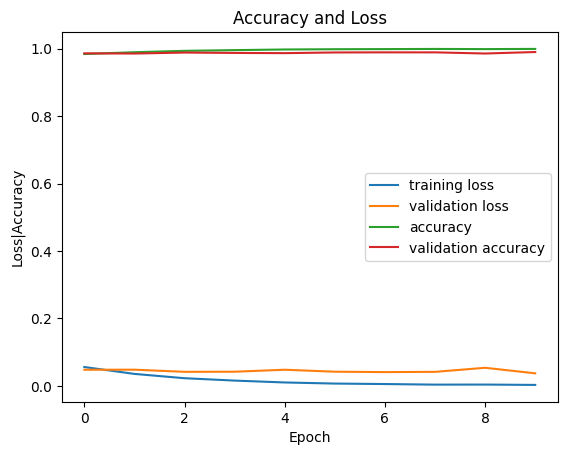

In [46]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [48]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.028994420543313026, 0.9911999702453613]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Giá trị dự đoán:  1


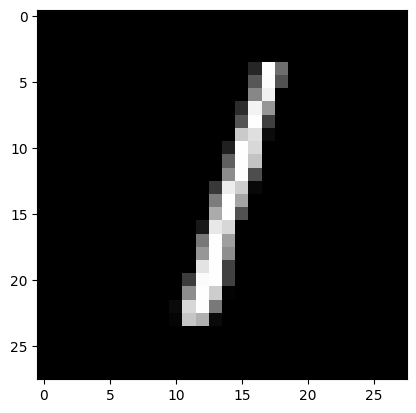

In [52]:
# 10. Dự đoán ảnh
plt.imshow(X_test[2].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[2].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))